# Business Understanding

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information 
like programming languages, salary, code style and various other information. This year, they amassed more than 
64,000 responses fielded from 213 countries. In this blog, I aimed to look at the data gathered as part of 
2017 developer survey and see what the developer community has to say.

With the given dataset we will try to answer the following 3 questions:

* What are the most popular programming languages?
* Once a coder, always a coder - or is it?
* What Skills are perceived as most important to get hired by a Tech firm

# Data Understanding

### Gather Data

In [1]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.warnings.filterwarnings('ignore')

In [2]:
relativePath=os.getcwd()
readFilePath=relativePath+"\\survey_results_public.csv"
df = pd.read_csv(readFilePath, sep=",")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Assess Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [4]:
df.iloc[:, 1:].describe()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [5]:
df.columns[df.isnull().mean() > 0.5].nunique()

53

# Data Preparation

### Clean Data

In [6]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

In [7]:
num_cols

['Respondent',
 'CareerSatisfaction',
 'JobSatisfaction',
 'HoursPerWeek',
 'StackOverflowSatisfaction',
 'Salary',
 'ExpectedSalary']

In [8]:
df['JobSatisfaction'].value_counts()

8.0     8983
7.0     7969
9.0     5573
6.0     4726
10.0    4148
5.0     3749
4.0     1865
3.0     1635
2.0      888
0.0      467
1.0      373
Name: JobSatisfaction, dtype: int64

### Visualize Data

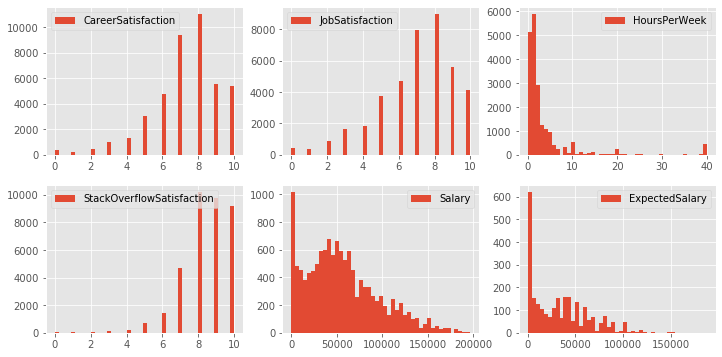

In [9]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,6))

for i, c in enumerate(num_cols[1:]):
    fig.add_subplot(2, 3, i+1)
    plt.hist(df[c], bins=45, label='%s' %c)
    plt.legend(loc=0)
plt.show()

In [10]:
# sns.heatmap(df[num_cols[1:]].corr(), annot = True, fmt=".2f")
# plt.show()

### Analyze Data

#### Suggestion for breaking into coding Job

In [11]:
df_sugg = df['CousinEducation'].str.split(';')

In [12]:
df_sugg.dropna(inplace=True)

In [13]:
sugg_list = list(set([x.strip() for x in list(set(df_sugg.sum(axis=0)))]))

In [14]:
sugg_list

['Take online courses',
 'Other',
 "Master's degree",
 'Return to college',
 'Buy books and work through the exercises',
 'Conferences/meet-ups',
 'Get a job as a QA tester',
 'Participate in online coding competitions',
 'Participate in hackathons',
 'Part-time/evening courses',
 'Bootcamp',
 'Contribute to open source',
 'None of these']

#### General Abilities 

In [15]:
ability_cols = ['ProblemSolving', 'LearningNewTech', 'JobSecurity', 'UnderstandComputers', 'ChallengeMyself', 'CompetePeers',
               'ChangeWorld', 'InvestTimeTools']

In [16]:
df['ProblemSolving'].value_counts()

Strongly agree       18040
Agree                11084
Somewhat agree        1890
Disagree               179
Strongly disagree      100
Name: ProblemSolving, dtype: int64

In [17]:
# Convert textual responses to ordinal values
rating = {'Strongly agree' : 5, 'Agree' : 4, 'Somewhat agree' : 3, 'Disagree' : 2, 'Strongly disagree' : 1}

In [18]:
for c in ability_cols:
    df.loc[:, c] = df.loc[:, c].map(rating)
    df.loc[:, c].replace(np.NaN, 0, inplace=True)

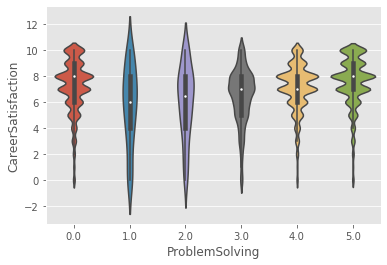

In [19]:
sns.violinplot(df['ProblemSolving'], df['CareerSatisfaction'])
plt.show()

#### Coding Experience

In [20]:
# Columns related to Coding experience
years_pgm = ['YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast']

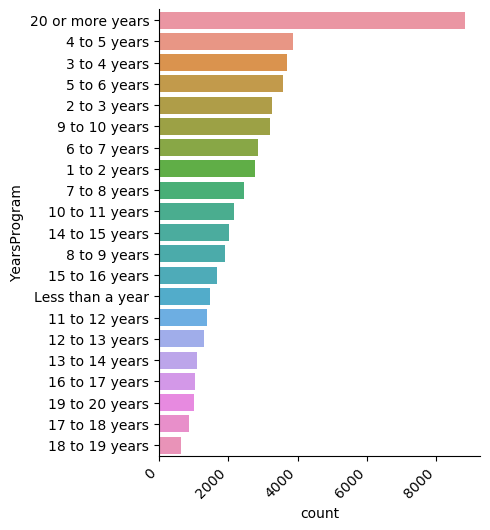

In [21]:
plt.style.use('default')
sns.catplot(y="YearsProgram", kind="count", data=df, order=df.YearsProgram.value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
le_5 = ['1 to 2 years', '2 to 3 years', '3 to 4 years', '4 to 5 years', 'Less than a year']
six_to_10 = ['5 to 6 years', '6 to 7 years', '7 to 8 years', '8 to 9 years', '9 to 10 years']
ele_to_15 = ['11 to 12 years', '12 to 13 years', '13 to 14 years', '14 to 15 years', '10 to 11 years']
sixt_to_20 = ['15 to 16 years', '16 to 17 years', '17 to 18 years', '18 to 19 years', '19 to 20 years']
over_20 = ['20 or more years']
all_exp = le_5 + six_to_10 + ele_to_15 + sixt_to_20 + over_20

In [23]:
for c in years_pgm:
    df.loc[:, c] = np.where((df.loc[:, c].isin(le_5)), 1.0, df.loc[:, c])
    df.loc[:, c] = np.where((df.loc[:, c].isin(six_to_10)), 2.0, df.loc[:, c])
    df.loc[:, c] = np.where((df.loc[:, c].isin(ele_to_15)), 3.0, df.loc[:, c])
    df.loc[:, c] = np.where((df.loc[:, c].isin(sixt_to_20)), 4.0, df.loc[:, c])
    df.loc[:, c] = np.where((df.loc[:, c].isin(over_20)), 5.0, df.loc[:, c])
    df.loc[:, c].replace(np.NaN, 0, inplace=True)

In [24]:
df['YearsProgram'].value_counts()

1.0    15074
2.0    14014
5.0     8817
3.0     7977
4.0     5263
0.0      247
Name: YearsProgram, dtype: int64

#### Education level distribution

In [25]:
df['FormalEducation'].value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

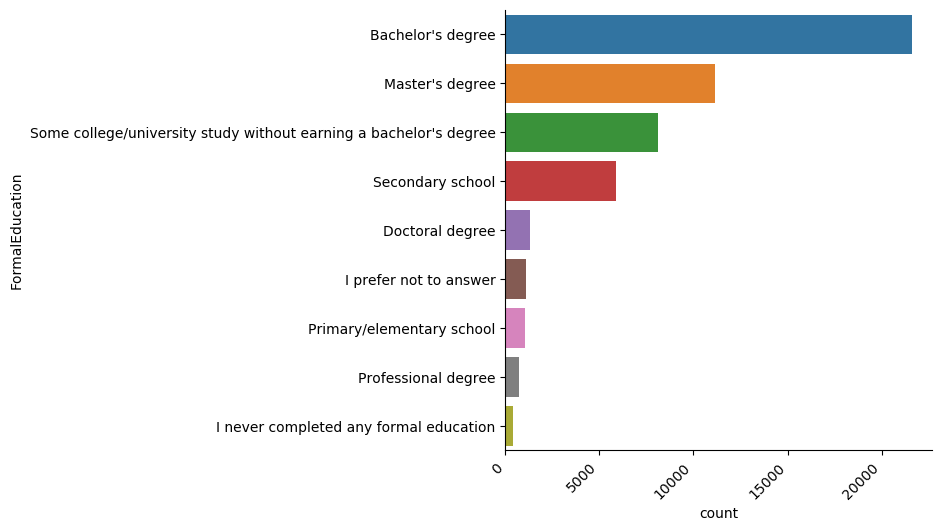

In [26]:
plt.style.use('default')
sns.catplot(y="FormalEducation", kind="count", data=df, order=df.FormalEducation.value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
# Convert textual values of FormalEducation to ordinal values
degree = {'Doctoral degree' : 5, 'Professional degree' : 4, 'Master\'s degree' : 3, 'Bachelor\'s degree' : 2, 
          'Some college/university study without earning a bachelor\'s degree' : 1}

In [28]:
df.loc[:, 'FormalEducation'] = df.loc[:, 'FormalEducation'].map(degree)
df.loc[~df["FormalEducation"].isin([1, 2, 3, 4, 5]), 'FormalEducation'] = 0

In [29]:
df['FormalEducation'].value_counts()

2.0    21609
3.0    11141
0.0     8490
1.0     8129
5.0     1308
4.0      715
Name: FormalEducation, dtype: int64

#### Stackoverflow Usage Analysis

In [30]:
# Columns related to Stackoverflow usage
stack_use_cols = ['StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 'StackOverflowJobListing', 
                  'StackOverflowCompanyPage', 'StackOverflowJobSearch', 'StackOverflowNewQuestion', 
                  'StackOverflowAnswer', 'StackOverflowMetaChat']

In [31]:
df['StackOverflowHelpful'].value_counts()

Agree                16502
Strongly agree       13902
Somewhat agree        3272
Disagree               192
Strongly disagree       78
Name: StackOverflowHelpful, dtype: int64

In [32]:
stack_use = {'At least once each day' : 5, 'At least once each week' : 4, 'Several times': 3, 'Once or twice' : 2, 'Haven\'t done at all' : 1} 

In [33]:
for c in stack_use_cols:
    df.loc[:, c] = df.loc[:, c].map(stack_use)
    df.loc[:, c].replace(np.NaN, 0, inplace=True)

In [34]:
df['StackOverflowFoundAnswer'].value_counts()

0.0    17102
4.0    13090
3.0    12441
5.0     5279
2.0     2861
1.0      619
Name: StackOverflowFoundAnswer, dtype: int64

In [35]:
stack_val = [re.sub(r"\B([A-Z])", r" \1", i[13:]) for i in stack_use_cols]

In [36]:
stack_val

['Found Answer',
 'Copied Code',
 'Job Listing',
 'Company Page',
 'Job Search',
 'New Question',
 'Answer',
 'Meta Chat']

In [37]:
df_stack = df.loc[:, stack_use_cols].apply(pd.value_counts)

In [38]:
df_stack.iloc[1:,:][::-1].T

,5.0,4.0,3.0,2.0,1.0
StackOverflowFoundAnswer,5279,13090,12441,2861,619
StackOverflowCopiedCode,1026,3811,10239,10400,8433
StackOverflowJobListing,279,1156,4477,7916,19640
StackOverflowCompanyPage,136,512,2201,4323,26263
StackOverflowJobSearch,199,803,2719,5492,24202
StackOverflowNewQuestion,131,431,3804,8338,20914
StackOverflowAnswer,429,1318,4683,7732,19394
StackOverflowMetaChat,225,377,1312,3236,28257


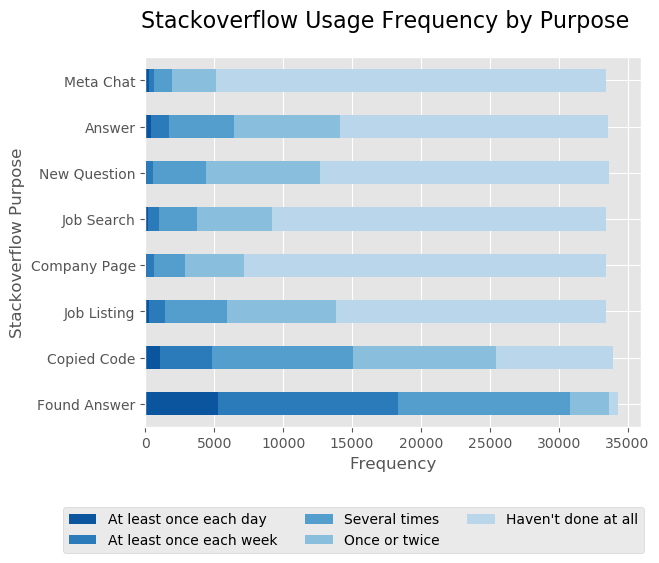

In [39]:
plt.style.use('ggplot')
df_stack.iloc[1:,:][::-1].T.plot.barh(stacked=True, color=sns.color_palette("Blues_r"))
plt.yticks(np.arange(8), labels=stack_val)
plt.legend(labels= stack_use.keys(), loc='lower left', bbox_to_anchor=(-0.18, -0.36), ncol= 3)
plt.xlabel("Frequency")
plt.ylabel("Stackoverflow Purpose")
plt.suptitle("Stackoverflow Usage Frequency by Purpose", fontsize =16)
plt.show()

#### Programming Language Analysis

In [60]:
df['HaveWorkedLanguage'].value_counts().head(10)

C#; JavaScript; SQL      1276
JavaScript; PHP; SQL     1143
Java                      913
JavaScript                807
JavaScript; PHP           662
Java; JavaScript; SQL     645
Java; JavaScript          585
C#                        540
Python                    529
C#; JavaScript            500
Name: HaveWorkedLanguage, dtype: int64

In [61]:
df['WantWorkLanguage'].value_counts().head(10)

JavaScript                         642
Python                             556
Java                               544
C#                                 475
C#; JavaScript; SQL                444
Java; JavaScript                   332
C#; JavaScript; SQL; TypeScript    326
JavaScript; PHP; SQL               324
C++                                317
Swift                              306
Name: WantWorkLanguage, dtype: int64

In [74]:
def lang(df, column):
    '''
    Input: Dataframe and the column with programming languages 
    Returns: Dataframe with the unique languages and the correspoding user frequency
    '''
    
    #Extract unique languages list
    df_lang = df[column].str.split(';')
    df_lang.dropna(inplace=True)
    lang_list = list(set([x.strip() for x in list(set(df_lang.sum(axis=0)))]))
    df_lang_freq = pd.DataFrame(lang_list, columns=['Language'])
    
    # Create a dataframe with user frequency for each language
    df_lang_exp = df[column].str.split(';', expand=True)
    for l in lang_list:
        df_lang_freq.loc[df_lang_freq['Language'] == l, 'Count']  = df_lang_exp[df_lang_exp.iloc[:, 0] == l].count().sum()
    df_lang_freq.loc[:, 'Count'] = df_lang_freq.loc[:, 'Count'].astype('int32')
    
    return df_lang_freq

In [75]:
df_hlang_freq = lang(df, 'HaveWorkedLanguage')
df_wlang_freq = lang(df, 'WantWorkLanguage')

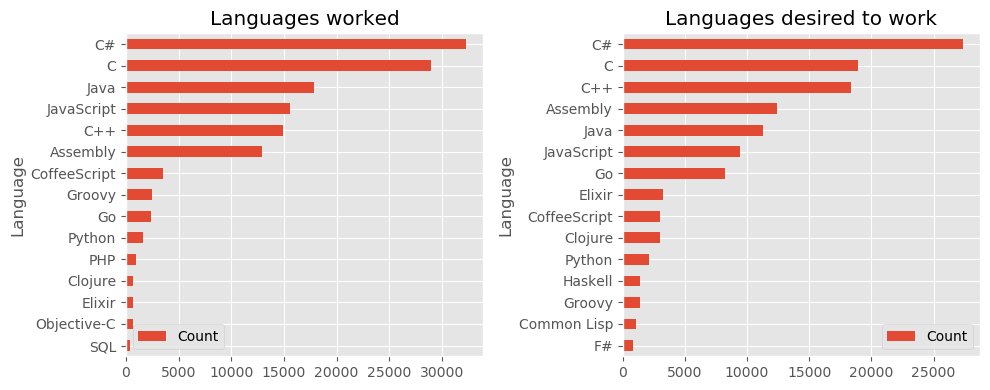

In [79]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,4)
df_hlang_freq.sort_values(by='Count', ascending=False).head(15)[::-1].plot(x='Language', y='Count', kind='barh', ax=ax1)
ax1.set_title('Languages worked')
df_wlang_freq.sort_values(by='Count', ascending=False).head(15)[::-1].plot(x='Language', y='Count', kind='barh', ax=ax2)
ax2.set_title('Languages desired to work')
plt.tight_layout()
plt.show()

#### Ex-Coder response analysis

In [50]:
# Columns related to Ex-coder
ex_coder = ['ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
           'ExCoderWillNotCode', 'ExCoderActive']

In [51]:
df['ExCoderNotForMe'].value_counts()

Strongly disagree    348
Disagree             324
Somewhat agree       132
Agree                 90
Strongly agree        27
Name: ExCoderNotForMe, dtype: int64

In [52]:
for c in ex_coder:
    df.loc[:, c] = df.loc[:, c].map(rating)
#     df.loc[:, c].replace(np.NaN, 0, inplace=True)

In [53]:
df.loc[:, ex_coder].isnull().sum() 

ExCoderReturn         50469
ExCoderNotForMe       50471
ExCoderBalance        50469
ExCoder10Years        50475
ExCoderBelonged       50464
ExCoderSkills         50457
ExCoderWillNotCode    50470
ExCoderActive         50462
dtype: int64

In [54]:
excoder = [re.sub(r"\B([A-Z])", r" \1", i[7:]) for i in ex_coder]

In [55]:
excoder

['Return',
 'Not For Me',
 'Balance',
 '10 Years',
 'Belonged',
 'Skills',
 'Will Not Code',
 'Active']

In [56]:
# Update the questions more descriptively
excoder[2] = 'Better Life Balance after leaving Coding Job'
excoder[3] = 'Better career now than 10 years ago'
excoder[4] = 'Did not feel belonged in the Coding Job'
excoder[5] = 'Current Skills are outdated'
excoder[6] = 'Will not Code again for living'

In [57]:
# Analyze only the repsonders 
df_excoder = df.loc[:, ex_coder].dropna()
df_excoder = df_excoder.apply(lambda x: pd.value_counts(x, normalize=True) *100)

In [58]:
df_excoder.iloc[::-1].T

,5.0,4.0,3.0,2.0,1.0
ExCoderReturn,15.826495,26.729191,23.681125,22.977726,10.785463
ExCoderNotForMe,3.048066,9.730363,13.599062,36.107855,37.514654
ExCoderBalance,10.550996,24.150059,21.453693,30.832356,13.012896
ExCoder10Years,5.392732,20.867526,27.901524,27.315358,18.522860
ExCoderBelonged,4.572098,12.426729,16.295428,34.818288,31.887456
ExCoderSkills,8.323564,25.908558,30.949590,24.150059,10.668230
ExCoderWillNotCode,6.213365,15.357562,20.867526,34.583822,22.977726
ExCoderActive,11.840563,31.301290,29.308324,20.398593,7.151231


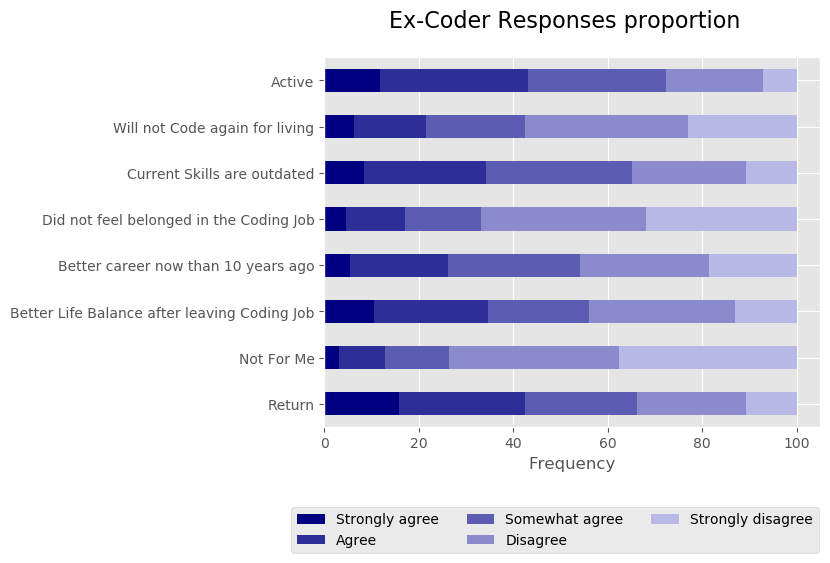

In [59]:
plt.style.use('ggplot')
df_excoder.iloc[::-1].T.plot.barh(stacked=True, color=sns.light_palette("navy", reverse=True))
plt.yticks(np.arange(8), labels=excoder)
plt.legend(labels= rating.keys(), loc='lower left', bbox_to_anchor=(-0.08, -0.36), ncol= 3)
plt.xlabel("Frequency")
# plt.ylabel("Ex-Coder Responses", labelpad=-600)
plt.suptitle("Ex-Coder Responses proportion", fontsize =16)
plt.show()

#### Hiring perception analysis

In [40]:
# Columns related to Hiring Importance 
imp_hire_cols = ['ImportantHiringAlgorithms', 'ImportantHiringTechExp', 'ImportantHiringCommunication', 
                  'ImportantHiringOpenSource', 'ImportantHiringPMExp', 'ImportantHiringCompanies',
                  'ImportantHiringTitles', 'ImportantHiringEducation', 'ImportantHiringRep', 'ImportantHiringGettingThingsDone']

In [41]:
df['ImportantHiringRep'].value_counts()

Not very important      10802
Somewhat important       7593
Not at all important     7002
Important                2573
Very important            648
Name: ImportantHiringRep, dtype: int64

In [42]:
imp_hire = {'Very important' : 5, 'Important' : 4, 'Somewhat important' : 3, 'Not very important' : 2, 'Not at all important' : 1}

In [43]:
for c in imp_hire_cols:
    df.loc[:, c] = df.loc[:, c].map(imp_hire)
    df.loc[:, c].replace(np.NaN, 0, inplace=True)

In [44]:
df['ImportantHiringOpenSource'].value_counts()

0.0    22796
3.0    10408
2.0     8696
4.0     5419
1.0     2560
5.0     1513
Name: ImportantHiringOpenSource, dtype: int64

In [45]:
skills = [re.sub(r"\B([A-Z])", r" \1", i[15:]) for i in imp_hire_cols]

In [46]:
skills

['Algorithms',
 'Tech Exp',
 'Communication',
 'Open Source',
 'P M Exp',
 'Companies',
 'Titles',
 'Education',
 'Rep',
 'Getting Things Done']

In [47]:
df_hire = df.loc[:, imp_hire_cols].apply(pd.value_counts)

In [48]:
df_hire.iloc[1:,:][::-1].T

,5.0,4.0,3.0,2.0,1.0
ImportantHiringAlgorithms,6463,11852,7890,2093,344
ImportantHiringTechExp,4551,10782,9308,3542,511
ImportantHiringCommunication,9775,13136,4750,830,148
ImportantHiringOpenSource,1513,5419,10408,8696,2560
ImportantHiringPMExp,1739,6487,9899,8080,2412
ImportantHiringCompanies,925,5591,11723,8323,1991
ImportantHiringTitles,854,5344,10734,8513,3108
ImportantHiringEducation,1016,5423,11034,8282,2908
ImportantHiringRep,648,2573,7593,10802,7002
ImportantHiringGettingThingsDone,9922,12753,4698,937,235


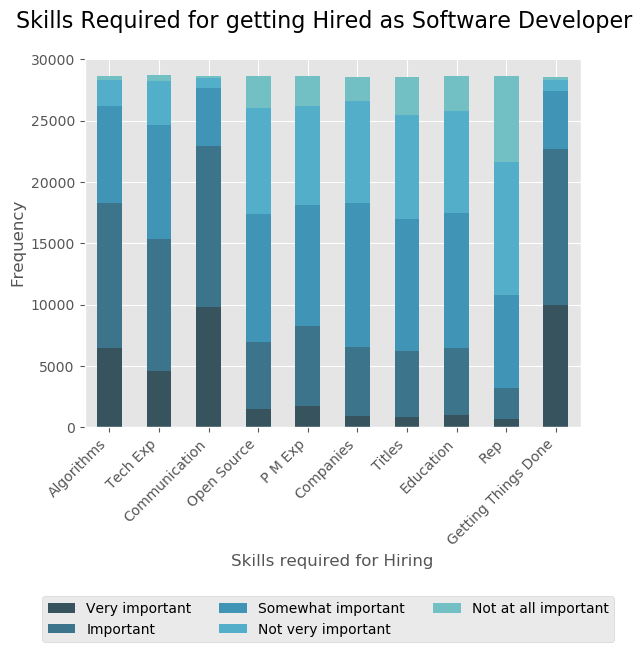

In [49]:
plt.style.use('ggplot')
df_hire.iloc[1:,:][::-1].T.plot.bar(stacked=True, color=sns.color_palette("GnBu_d"))
plt.xticks(np.arange(10), labels=skills, rotation=45, ha='right')
plt.legend(labels= imp_hire.keys(), loc='lower left', bbox_to_anchor=(-0.1, -0.60), ncol= 3)
plt.xlabel("Skills required for Hiring")
plt.ylabel("Frequency")
plt.suptitle("Skills Required for getting Hired as Software Developer",fontsize =16)
plt.show()

# Evaluation and Results

Following are the brief answers to the questions raised:

* __C#__ and __C__ are the most popular programming languages currently and they are closely followed by C++, Java and JavaScript.
* Once a coder may _not_ always be a coder as a considerable proportion think that a coding job is not for everyone.
* __Getting Things Done__ and __Communication__ are the most important skills required to get hired by a tech firm while just  __Education Credentials__ may not be of a high value.